<img width="50" src="https://carbonplan-assets.s3.amazonaws.com/monogram/dark-small.png" style="margin-left:0px;margin-top:20px"/>

# MTBS Fire Supersection Averages

_by Jeremy Freeman (CarbonPlan), Januyar 13, 2020_

This notebook loads downsampled MTBS fire data and shows avearges within supersections.


In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import geopandas as gpd
import regionmask as rm
from carbonplan_forests import load, setup, plot, fit, utils, prepare, collect

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from showit import image, tile

In [26]:
from palettable.colorbrewer.sequential import YlOrRd_9
import matplotlib.pyplot as plt
cmap = YlOrRd_9.mpl_colormap

In [3]:
setup.plotting(remote=False)

In [4]:
%load_ext autoreload
%autoreload 2

Set variables

In [11]:
coarsen = 16
tlim = (1984, 2018)
store = "local"

Load the mask from `nlcd`

In [13]:
mask = load.mask(store=store, year=2001)

Load the `mtbs` data


In [14]:
mtbs = load.mtbs(store=store, coarsen=coarsen, tlim=tlim, mask=mask)

Load the supersections

In [15]:
regions = gpd.read_file("data/supersections.geojson")

In [16]:
masks = rm.mask_3D_geopandas(regions, mtbs)

Create integrated risk function

In [17]:
from scipy.stats import binom
def integrated_risk(p):
    return (1 - binom.cdf(0, 100, p)) * 100

Make map before 2000

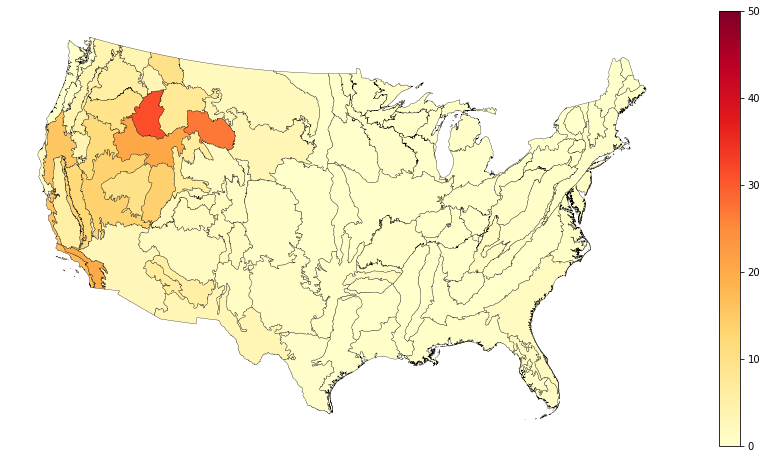

In [32]:
before_2000 = mtbs.sel(time=slice('1984','2000')).groupby('time.year').sum().mean('year')
risks_before_2000 = np.asarray(
    [before_2000.monthly.where(masks.sel(region=i)).mean(['x','y']).values.item() for i in masks['region']]
)
regions.to_crs('EPSG:5070').plot(
    integrated_risk(risks_before_2000), figsize=[15, 8], cmap=cmap, 
    edgecolor=[0,0,0], linewidth=0.3, vmin=0, vmax=50, legend=True
)
plt.axis('off');

Make map after 2000

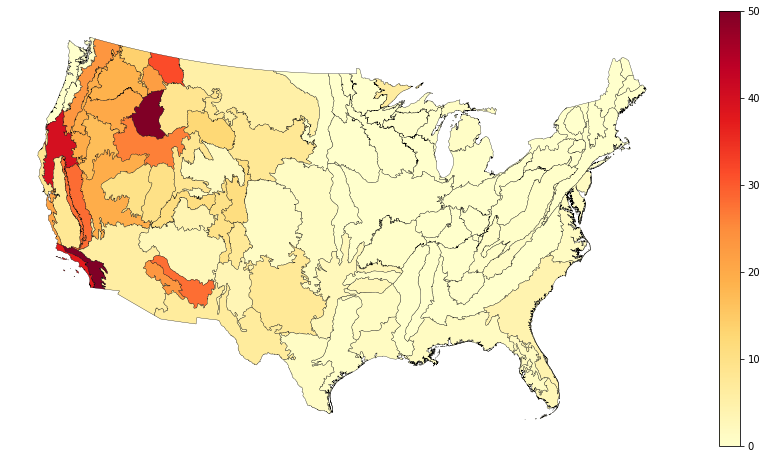

In [30]:
after_2000 = mtbs.sel(time=slice('2001','2017')).groupby('time.year').sum().mean('year')
risks_after_2000 = np.asarray(
    [after_2000.monthly.where(masks.sel(region=i)).mean(['x','y']).values.item() for i in masks['region']]
)
regions.to_crs('EPSG:5070').plot(
    integrated_risk(risks_after_2000), figsize=[15, 8], cmap=cmap, 
    edgecolor=[0,0,0], linewidth=0.3, vmin=0, vmax=50, legend=True
)
plt.axis('off');